In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# Setting 

We will simulate a one-player version of the game [twenty-one](https://en.wikipedia.org/wiki/Twenty-One_(banking_game)). The objective is to draw cards one at a time from an infinite playing deck and acquire a card sum as large as possible without going over 21.

## States

The state can be described by the sum of the card values in our hand. These will range from 12 to 21, as well as a terminal state for any value greater than 21. (We do not include values less than 12 since there is only one possible action to take for those card sums.)

We may also hold an ace card, which can have a value of either 1 or 11. If we have an ace and choose to assign it value 11, we call it a "usable ace". Thus, we also need to distinguish the valid states from 12 to 21 as either containing or not containing a usable ace.

In total, we have 21 states:
- $s_1$ to $s_{10}$: Hand values 12 to 21 without a usable ace.
- $s_{11}$ to $s_{20}$: Hand values 12 to 21 with a usable ace.
- $s_{21}$: Terminal state.

## Actions and Transitions

At each turn we can take one of two actions: "hit" to draw a card, and "stop" to end the game. These actions are accessible from every state except $s_{21}$. Choosing to "stop" from any state brings us to $s_{21}$.

If we choose to "hit", we add a random valued card $c$ to our hand. The probability of $c$ being between 1 and 9 is $\frac1{13}$, and the probability of $c$ being 10 is $\frac4{13}$. If $c$ increases the hand total beyond 21, then we go to $s_{21}$, **except** when our hand contains a usable ace. In that case, we automatically convert the ace's value from 11 to 1, and so we increase our hand value by $c-10$. If that happens, our ace is no longer usable.

The state transtions for the "hit" action can thus be summarized as follows:

- From $s_i \in \{s_1, ..., s_{10}\}$, we may transition to either $s_{i+c} \in \{s_1, ..., s_{10}\}$ or $s_{21}$.
- From $s_i \in \{s_{11}, ..., s_{20}\}$, we may transition to either $s_{i+c} \in \{s_{11}, ..., s_{20}\}$ or $s_{i+c-10} \in \{s_1, ..., s_{10}\}$.

## Utilities

Finally, we will need a utility function to describe the game. To keep things simpler, only the "stop" action will yield nonzero utility. The player receives 0 utility from the "hit" action regardless of the starting or successor state.

In two-player blackjack, "stopping" at a given state will yield a certain probability of winning, depending on the dealer's hand. Since we do not have a dealer here, we will just assigned fixed utilities for stopping at different states.

One possible utility function would just be the hand value itself:
$$u_1(s_i) = \begin{cases} i+11, & i=1,...,10 \\ i+1 & i=11,...,20 \\ 0 & i=21 \end{cases}$$

We can perform nonlinear transformations of $u_1$ to define other utility functions. We will consider the two shown below:
$$ \begin{align*} u_2(s_i) &= u_1(s_i)^2 \\
u_3(s_i) &= \sqrt{u_1(s_i)} \end{align*} $$

# Part 1 [12 points]

Generate the $21 \times 21$ transition matrix $T$ for the hit action, where $T_{ij} = P(s_j|s_i)$ and $i$ and $j$ index the states as described above. Each row corresponds to a current state, and each column corresponds to the next state.

All rows except the last should sum to 1. The last row, which corresponds to state $s_{21}$, can just be a row of 0s to indicate that the "hit" action is not available in the terminal state.

Compute and print out the row sums of your transition matrix. Also use `plt.imshow()` to show an image representation of the matrix (to assist us in grading).

In [18]:
states = 21
probs = np.array([1 / 13] * 9 + [4 / 13] + [0] * 10)

def gen_P():
    T = np.zeros((states-1, states-1))
    for i in range(states - 2):
        T[i,:] = np.roll(probs, i+1)
    T[:10, 10:] = 0
        
    return T

transitions = np.array(gen_P())
transitions = np.column_stack((transitions, 1-np.sum(transitions, axis = 1)))
transitions = np.row_stack((transitions, np.zeros(states)))
print(transitions)

[[0.00000000e+00 7.69230769e-02 7.69230769e-02 7.69230769e-02
  7.69230769e-02 7.69230769e-02 7.69230769e-02 7.69230769e-02
  7.69230769e-02 7.69230769e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.07692308e-01]
 [0.00000000e+00 0.00000000e+00 7.69230769e-02 7.69230769e-02
  7.69230769e-02 7.69230769e-02 7.69230769e-02 7.69230769e-02
  7.69230769e-02 7.69230769e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.84615385e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.69230769e-02
  7.69230769e-02 7.69230769e-02 7.69230769e-02 7.69230769e-02
  7.69230769e-02 7.69230769e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.61538462e-01]
 [0.00000000e+00

/tmp/ipykernel_28/1076887177.py:14: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  transitions = np.row_stack((transitions, np.zeros(states)))


In [3]:
transitions.sum(axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0.])

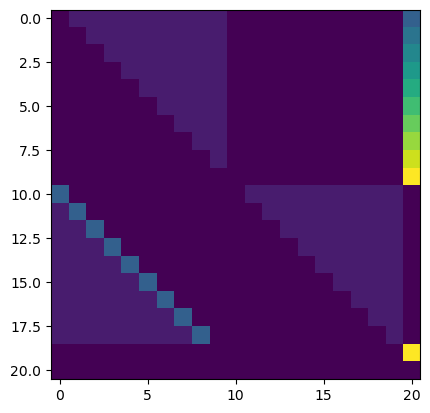

In [4]:
plt.imshow(transitions)
plt.show()

# Part 2 [12 points]

Write a function to perform value iteration and find the optimal values and policy of each of the states. The inputs are the transition matrix (for the "hit" action), utility values (for the "stop" action), discount factor, and convergence threshold. 

The output should consist of two length-21 arrays: the set of converged values, and the policy described by 0s ("stop") and 1s ("hit"). 

In [5]:
utility = np.random.rand(states)
for i in range(states):
    if i < 10:
        utility[i] = i + 12
    elif i < 20:
        utility[i] = i + 2
    else:
        utility[i] = 0
utility

array([12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21.,  0.])

In [6]:
def extract_policy(utility, V, beta):
    EV = np.empty((states, 2))
    EV[:,0] = utility
    EV[:,1] = beta * transitions @ V
    pi = np.argmax(EV, axis=1)
    return pi

def value_iteration(transitions, utility, beta, tol):
    V = np.zeros(states)
    diffs = []

    while True:
        EV = np.empty((states, 2))
        EV[:,0] = utility
        EV[:,1] = beta * transitions @ V
        new = np.max(EV, axis=1)
        diffs.append(np.linalg.norm(new-V))
        if diffs[-1] < tol:
            V = new 
            policy = extract_policy(utility, V, beta)
            return V, policy
        V = new

In [7]:
# Went to the office hour and the version above should do the same thing, not sure if this question required us to write in on function, to be safe I'm including the one function version below:
def value_iteration_backup(transitions, utilities, beta, tol):
    V = np.zeros(states)
    while True:
        EV = np.zeros((states, 2))
        EV = np.vstack((utilities, beta * transitions @ V))
        VNew = np.max(EV, axis = 0)
        policy = np.argmax(EV, axis = 0)
        if np.linalg.norm(V - VNew) < tol:
            return VNew, policy
        V = VNew
# To call this function, simply do
# V, policy = value_iteration_backup(transitions, u, beta, tol)

# Part 3 [16 points]

Using discount factor $\beta=1$, run three instances of value iteration, each one using a corresponding utility function $u_1$, $u_2$, and $u_3$. For each instance,

- Print out the computed policy.

- Generate a scatter plot in which the x-axis ranges from 12 to 21, and the y-axis denotes state values. You should overlay the values of all states from $s_{1}$ to $s_{20}$ on each plot. Use different markers for $s_1$ to $s_{10}$ vs $s_{11}$ to $s_{20}$, and include a legend.

Once you have generated the results above, briefly answer the following questions:

1. How does the utility function affect the magnitudes of the state values?

2. For which utility function(s) do we have the same optimal action in states $s_1$ to $s_{10}$? What is that action?

3. For which utility function(s) do we have *different* optimal actions in some states vs others, among those in $s_1$ to $s_{10}$? Briefly explain why these utilities may lead to different policies from those in 2.

4. For states $s_{11}$ to $s_{20}$, give a brief explanation for why we generally see one optimal action when the hand value is lower vs when the hand value is higher.

5. For states $s_{11}$ to $s_{20}$ and utility $u_2$, you should see that their values do not increase monotonically. Briefly explain this observation.

In [8]:
u1 = utility
u1

array([12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21.,  0.])

In [9]:
u2 = u1 ** 2
u2

array([144., 169., 196., 225., 256., 289., 324., 361., 400., 441., 144.,
       169., 196., 225., 256., 289., 324., 361., 400., 441.,   0.])

In [10]:
u3 = u1 ** (1/2)
u3

array([3.46410162, 3.60555128, 3.74165739, 3.87298335, 4.        ,
       4.12310563, 4.24264069, 4.35889894, 4.47213595, 4.58257569,
       3.46410162, 3.60555128, 3.74165739, 3.87298335, 4.        ,
       4.12310563, 4.24264069, 4.35889894, 4.47213595, 4.58257569,
       0.        ])

In [11]:
def extract_policy(utility, V, beta):
    EV = np.empty((states, 2))
    EV[:,0] = utility
    EV[:,1] = beta * transitions @ V
    pi = np.argmax(EV, axis=1)
    return pi

def value_iteration(transitions, utility, beta, tol):
    V = np.zeros(states)
    diffs = []

    while True:
        EV = np.empty((states, 2))
        EV[:,0] = utility
        EV[:,1] = beta * transitions @ V
        new = np.max(EV, axis=1)
        diffs.append(np.linalg.norm(new-V))
        if diffs[-1] < tol:
            V = new 
            policy = extract_policy(utility, V, beta)
            return V, policy
        V = new

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
[1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]


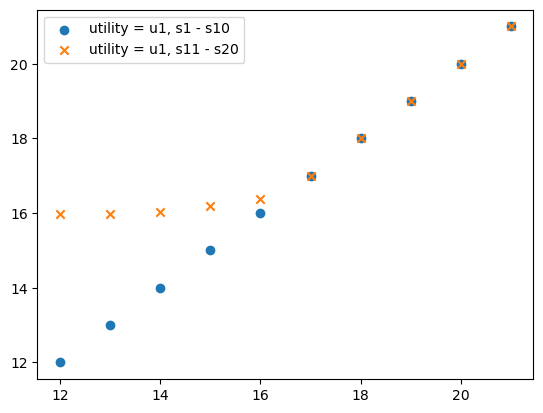

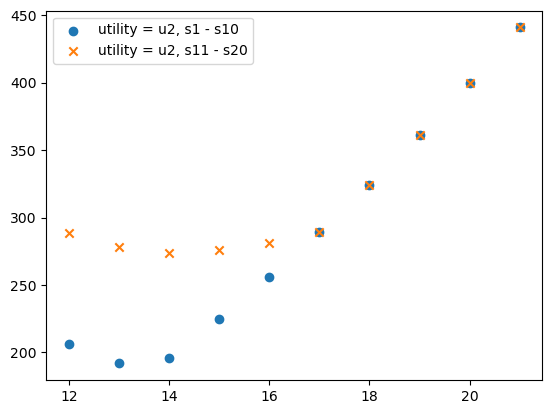

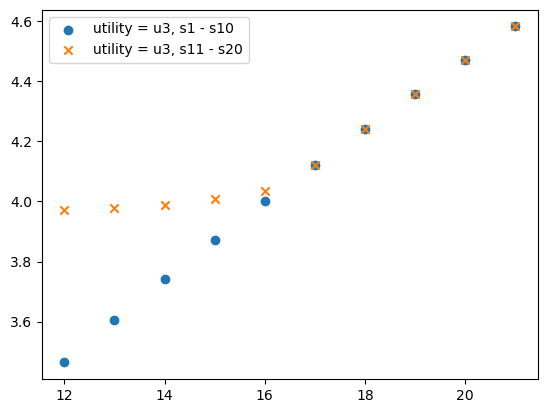

In [12]:
tol = 1e-6
utilities = [u1, u2, u3]
lables = ['u1', 'u2', 'u3']
beta = 1
for u, lable in zip(utilities, lables):
    V, policy = value_iteration(transitions, u, beta, tol)
    print(policy)
    plt.Figure()
    plt.scatter(range(12, 22), V[:10], label=f"utility = {lable}, s1 - s10", marker = 'o')
    plt.scatter(range(12, 22), V[10:20], label=f"utility = {lable}, s11 - s20", marker = 'x')
    plt.legend()
    plt.show()

1. How does the utility function affect the magnitudes of the state values?

We see for u1, it's directly proportional to the value (more like growing linearly). While for u2, we see influence with the suqaring (might want to say it enlarged rewards of hit), higher states have significantly higher values, especially comparing with u1. For u3, we see generally lower overall than u1 and u2, corresponding with how it's doing the square roots. The difference in value of lower and higher states are not that large as that of u2 and u1. Or, if we're asking to compare these three plots, though not exactly, generally we can see the change in magnitude is kind of follow the utility function. For example, as ${u_2 = u_1^2}$, we see the magnitude of state values from the plot of u2 is also kind of **2. Similarly, plot for u3 is also kind of showing the similar pattern.

2. For which utility function(s) do we have the same optimal action in states $s_1$ to $s_{10}$? What is that action?

From the policy printed out, we might want to say u1 and u3, as they have 0 for the first 10 values for the policy. The corresponding action would be 'stop'. 

3. For which utility function(s) do we have *different* optimal actions in some states vs others, among those in $s_1$ to $s_{10}$? Briefly explain why these utilities may lead to different policies from those in 2.

From the policy printed out, we might want to say u2, as for the first 10 values of the policy printed, we see 0s and 1s (1 for s1 and s2). One reason might be ${u_2 = u_1^2}$, it has much larger influence, like it enlarged rewards for hit, so might cause 'hit' gets more and thus lead to optimal action.

4. For states $s_{11}$ to $s_{20}$, give a brief explanation for why we generally see one optimal action when the hand value is lower vs when the hand value is higher.

Because when hand value is lower, we say the risk is relatively lower and potential reward for hit is higher (hit might lead to higher utility). Thus more hit would seems to be optimal. However, when the hand value is higher, the risk is higher, or the chance of drawing a card and exceed 21 is higher, the reward of hit is not that significant compare to this risk, thus more stop might be preferred. 

5. For states $s_{11}$ to $s_{20}$ and utility $u_2$, you should see that their values do not increase monotonically. Briefly explain this observation.

${u_2 = u_1^2}$ causing it to have greater influence and rewarding hit at the beginning as mentioned before, which might includes more risk and possibility decreasing in values. We do see s11 to s20 and utility u2 and in the policy we printed it has greatest number of 1s, means more hit that others. How it takes risk with hit, with the usable ace and might turn into other states.

# Part 4 [10 points]

Run value iteration and generate the same outputs as in Part 3. This time, each instance should be based on the utilities $u_2$, but differ in the values of $\beta$. Use $\beta = 0.9, 0.7, 0.5$. Then briefly answer the following:

1. How does the value of $\beta$ generally affect the magnitude of the optimal state values?

2. Which states see their optimal actions change as $\beta$ decreases? Briefly explain, particularly as it relates to myopic vs forward-looking decision making.

In [13]:
utility = u2

In [14]:
def extract_policy(utility, V, beta):
    EV = np.empty((states, 2))
    EV[:,0] = utility
    EV[:,1] = beta * transitions @ V
    pi = np.argmax(EV, axis=1)
    return pi

def value_iteration(transitions, utility, beta, tol):
    V = np.zeros(states)
    diffs = []

    while True:
        EV = np.empty((states, 2))
        EV[:,0] = utility
        EV[:,1] = beta * transitions @ V
        new = np.max(EV, axis=1)
        diffs.append(np.linalg.norm(new-V))
        if diffs[-1] < tol:
            V = new 
            policy = extract_policy(utility, V, beta)
            return V, policy
        V = new

[1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


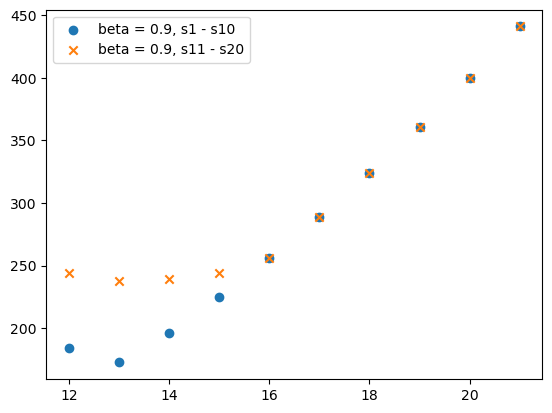

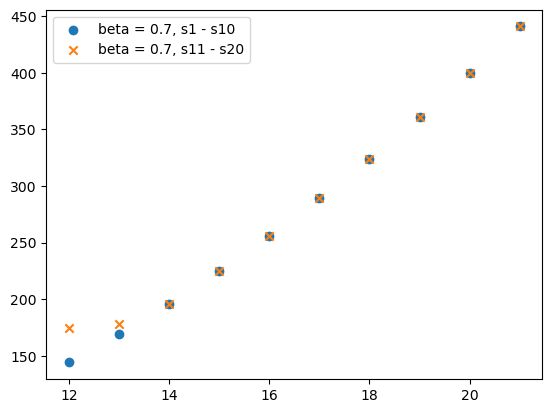

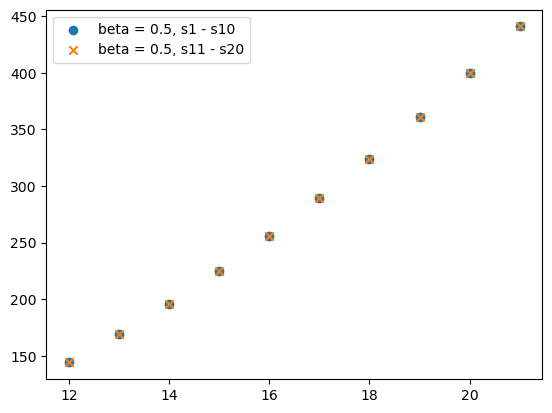

In [15]:
tol = 1e-6
for beta in [0.9, 0.7, 0.5]:
    V, policy = value_iteration(transitions, utility, beta, tol)
    print(policy)
    plt.Figure()
    plt.scatter(range(12, 22), V[:10], label=f"beta = {beta}, s1 - s10", marker = 'o')
    plt.scatter(range(12, 22), V[10:20], label=f"beta = {beta}, s11 - s20", marker = 'x')
    plt.legend()
    plt.show()

1. How does the value of $\beta$ generally affect the magnitude of the optimal state values?

For larger beta values, we might have larger magnitude of optimal state values, as the discount factor is larger, more future reward is considered. This also correspond with the plot we get, we say generally kind of larger values, with policy having more hit, or we say might take a bit more risks for possible benefit with forward-looking. While for lower beta, we see kind of bit lower optimal state values, and less hit in the policy printed, seems to be less risk taken, as we're not  weighting that much for future potential gain.

2. Which states see their optimal actions change as $\beta$ decreases? Briefly explain, particularly as it relates to myopic vs forward-looking decision making.

We might want to see, from the policy and plots, s1, s2, s11-s14. For these states, or what we say reletive early for s1-s10 and s11-s20 respectively, lower beta means less porward-looking. Thus higher beta for these states would encourage hit more with forward-looking, while lower beta encourage immediate utility with less risk, being myopic.
